## Newton-Raphson Method
https://miqbalrp.medium.com/mencari-akar-persamaan-menggunakan-python-newton-raphson-method-7b4ef18d9093

In [ ]:
def newtons(f,df,x0):
  e = 10**-4
  N = 100
  for i in range (0,N):
    print("%d   | %f    | %f    " %(i,x0,f(x0)))
    if abs(f(x0)) < e:
      return x0,i
    if df(x0) == 0:
      print("Zero derivative")
      return None
    x0 = x0 - f(x0)/df(x0)
  print("Maximum iteration")
  return x0, i

f  = lambda x: x**4+x-10
df = lambda x: 4*x**3+1
x0 = 3.5

x_root, iteration = newtons(f,df,x0)
print('Result : ', x_root)
print('In %d iteration' %iteration)

0   | 3.500000    | 143.562500    
1   | 2.667754    | 43.318153    
2   | 2.104775    | 11.730382    
3   | 1.798478    | 2.260606    
4   | 1.705329    | 0.162650    
5   | 1.697523    | 0.001060    
6   | 1.697472    | 0.000000    
Result :  1.6974718830770552
In 6 iteration


### Draw Chart

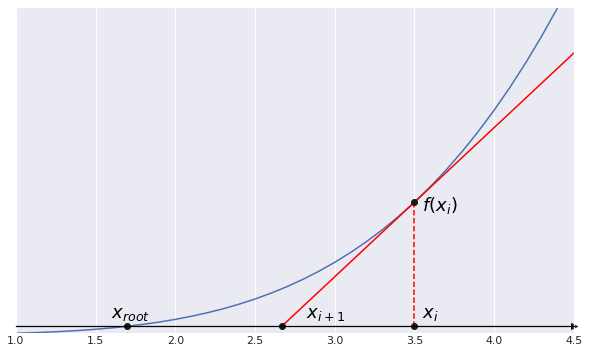

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

f  = lambda x: x**4+x-10
df = lambda x: 4*x**3+1
a  = 1
b  = 4.5

x0 = 3.5
x1 = x0 - f(x0)/df(x0)

x = np.arange(a,b,0.1)

fig = plt.figure(figsize=(10,6))
ax  = plt.axes(xlim=(a,b),ylim=(min(f(x)),max(f(x))))

plt.yticks([],[])

ax.spines["bottom"].set_position(("data", 0))
ax.spines["bottom"].set_color('black')
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)

sns.lineplot(x=x, y=f(x))

x2 = 4.5
y2 = (df(x0)*(x2 - x0)) + f(x0)
ax.plot([x0,x0],[f(x0),0], 'red', linestyle='dashed',)
ax.plot([x2,x1],[y2,0], 'red')
ax.plot([x0],[0], 'ko')
ax.plot([x0],[f(x0)], 'ko')
ax.plot([x1],[0], 'ko')
ax.plot([ 1.6974718808848637],[0], 'ko')

ax.text(x=x0+0.05, y=10, s=r'$x_{i}$', color='black', fontsize=18, horizontalalignment='left')
ax.text(x=x0+0.05, y=f(x0)-10, s=r'$f(x_i)$', color='black', fontsize=18, horizontalalignment='left')
ax.text(x=x1+0.15, y=10, s=r'$x_{i+1}$', color='black', fontsize=18, horizontalalignment='left')
ax.text(x=1.6974718808848637-0.1, y=0+10, s=r'$x_{root}$', color='black', fontsize=18, horizontalalignment='left')

# plt.savefig('newton-raphson.png')
# from google.colab import files
# files.download('newton-raphson.png')

plt.show()

### Draw Animation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
%matplotlib inline
sns.set()

f  = lambda x: x**4+x-10
df = lambda x: 4*x**3+1
a  = 1
b  = 4.5

x0 = 3.5
x1 = x0 - f(x0)/df(x0)

x = np.arange(a,b,0.1)

fig = plt.figure(figsize=(10,6))
ax  = plt.axes(xlim=(a,b),ylim=(min(f(x)),max(f(x))))

plt.yticks([],[])

ax.spines["bottom"].set_position(("data", 0))
ax.spines["bottom"].set_color('black')

sns.lineplot(x=x, y=f(x))

x2 = 4.5
y2 = (df(x0)*(x2 - x0)) + f(x0)

m_line, = ax.plot([x2,x1],[y2,0], 'red')
x0_dot, = ax.plot([x0],[0], 'yo', markersize=10)
x1_dot, = ax.plot([x1],[0], 'go', markersize=10)
v_line, = ax.plot([x0,x0],[f(x0),0], 'k', linestyle='dashed',)

ax.legend(['function','gradient',r'$x_i$',r'$x_{i+1}$'])

def newtons_ani(f,df,x0):
  e = 10**-4
  N = 10

  arr_x0 = np.array([])
  arr_x1 = np.array([])
  arr_y2 = np.array([])

  for i in range (0,N):
    x0 = x0
    x1 = x0 - f(x0)/df(x0)
    y2 = (df(x0)*(x2 - x0)) + f(x0)

    arr_x0 = np.append(arr_x0,x0)
    arr_x1 = np.append(arr_x1,x1)
    arr_y2 = np.append(arr_y2,y2)
    if abs(f(x0)) < e:
      return arr_x0,arr_x1,arr_y2
      break
    if df(x0) == 0:
      print("Zero derivative")
      break
    x0 = x0 - f(x0)/df(x0)
  print("Maximum iteration")
  return arr_x0,arr_x1,arr_y2

arr_x0,arr_x1,arr_y2 = newtons_ani(f,df,x0)

def animate(i):
  m_line.set_data([x2,arr_x1[i]],[arr_y2[i],0])
  x0_dot.set_data([arr_x0[i]],[0])
  x1_dot.set_data([arr_x1[i]],[0])
  v_line.set_data([arr_x0[i],arr_x0[i]],[f(arr_x0[i]),0])
  return m_line, x0_dot, x1_dot, v_line,


plt.rcParams['animation.html'] = 'html5'
anim = animation.FuncAnimation(fig, animate, frames=len(arr_x0),
                                      blit=False, repeat=True, interval=1000)
plt.close()
anim

# anim.save('newton-raphson.mp4', fps=1, extra_args=['-vcodec', 'libx264'])
# from google.colab import files
# files.download("newton-raphson.mp4")